<a href="https://colab.research.google.com/github/SebastianSoto17/Computational-Intelligence/blob/main/Tarea_1_EDA_y_preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer

# Conjunto de datos seleccionado


Este conjunto de datos es acerca de los precios de la cotización del Oro, un mineral el cual notablemente ha tomado importancia este último año debido a la alza de la cotización en bolsa. Debido a la naturaleza del problema podemos buscar aplicar regresion para que nuestro modelo intente predecir o asemejarse con cierto margen de error a valores a futuro de el oro.

Enlace al dataset : https://www.kaggle.com/datasets/ashrafkhetran/gold-price-analysis-and-forecasting-yfinance

# Problema

En este caso vamos a tratar de crear un modelo con un problema regresion el cual nos ayude a tratar de predecir el valor de cierre de la acción, es decir el precio al final del día, para de esta manera entender los patrones y tratar de brindar un estimado mas certero para decisiones de compra o venta

In [ ]:
import os
data = pd.read_csv(os.path.join('/content/','gold_data.csv'))
data

,Price,Close,High,Low,Open,Volume
0,Ticker,GC=F,GC=F,GC=F,GC=F,GC=F
1,Date,NaN,NaN,NaN,NaN,NaN
2,2016-01-04,1075.0999755859375,1082.5,1063.199951171875,1063.4000244140625,143
3,2016-01-05,1078.4000244140625,1081.5,1075.300048828125,1075.5999755859375,82
4,2016-01-06,1091.9000244140625,1093.699951171875,1081.5999755859375,1081.5999755859375,52
...,...,...,...,...,...,...
2525,2026-01-16,4588.39990234375,4608.0,4588.39990234375,4608.0,352
2526,2026-01-20,4759.60009765625,4764.0,4661.7998046875,4662.2001953125,175
2527,2026-01-21,4831.7998046875,4872.2998046875,4771.5,4863.5,1706
2528,2026-01-22,4908.7998046875,4908.7998046875,4791.89990234375,4791.89990234375,1175


In [ ]:
data = pd.read_csv('/content/gold_data.csv', skiprows=2)
data.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

data['Date'] = pd.to_datetime(data['Date'])
for col in ['Close', 'High', 'Low', 'Open', 'Volume']:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data

,Date,Close,High,Low,Open,Volume
0,2016-01-04,1075.099976,1082.500000,1063.199951,1063.400024,143
1,2016-01-05,1078.400024,1081.500000,1075.300049,1075.599976,82
2,2016-01-06,1091.900024,1093.699951,1081.599976,1081.599976,52
3,2016-01-07,1107.699951,1109.400024,1091.599976,1091.599976,122
4,2016-01-08,1097.800049,1111.099976,1093.000000,1111.099976,98
...,...,...,...,...,...,...
2523,2026-01-16,4588.399902,4608.000000,4588.399902,4608.000000,352
2524,2026-01-20,4759.600098,4764.000000,4661.799805,4662.200195,175
2525,2026-01-21,4831.799805,4872.299805,4771.500000,4863.500000,1706
2526,2026-01-22,4908.799805,4908.799805,4791.899902,4791.899902,1175


In [ ]:
#Columnas y tipo de datos
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2528 non-null   datetime64[ns]
 1   Close   2528 non-null   float64       
 2   High    2528 non-null   float64       
 3   Low     2528 non-null   float64       
 4   Open    2528 non-null   float64       
 5   Volume  2528 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.6 KB


In [ ]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,2528,2021-01-13 04:07:47.088607744,2016-01-04 00:00:00,2018-07-11 18:00:00,2021-01-13 12:00:00,2023-07-20 06:00:00,2026-01-23 00:00:00,NaN
Close,2528.0,1849.384492,1073.900024,1300.450012,1761.300049,1965.199982,4976.200195,699.323231
High,2528.0,1858.323537,1081.5,1305.424988,1769.899963,1973.724976,4976.200195,703.961767
Low,2528.0,1839.758267,1063.199951,1295.099976,1754.049988,1955.975037,4936.0,693.138522
Open,2528.0,1848.646638,1063.400024,1298.674957,1762.450012,1965.425049,4949.600098,697.839287
Volume,2528.0,5154.848497,0.0,53.0,211.5,656.0,386334.0,28462.603861


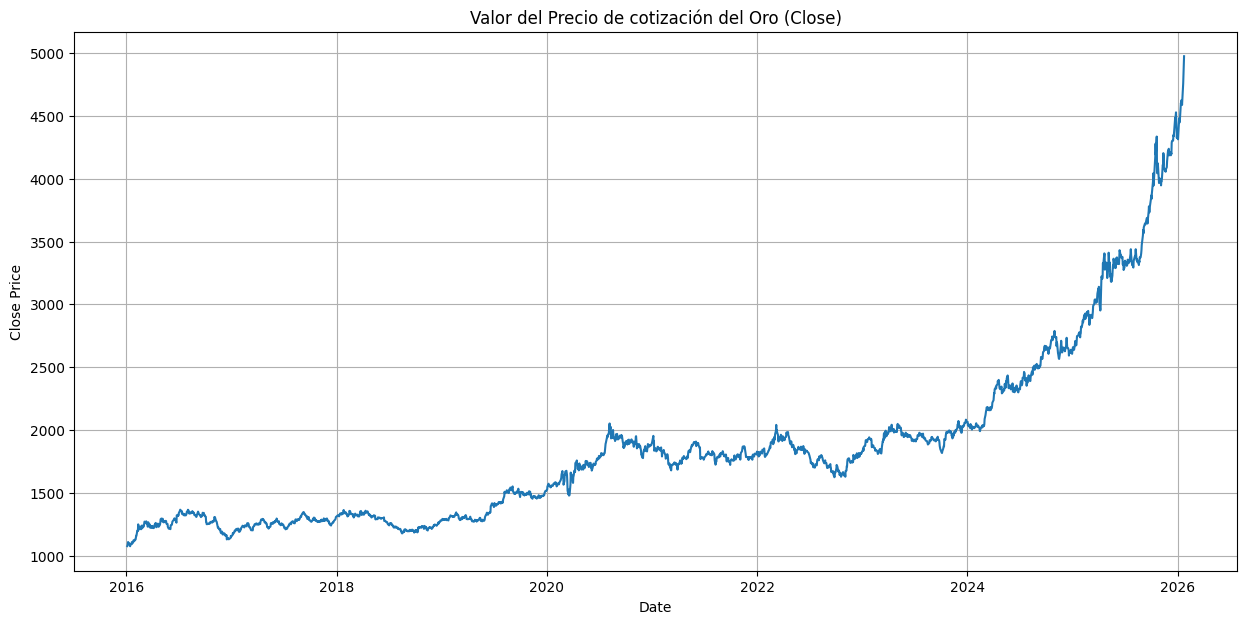

In [ ]:
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.lineplot(data=data, x='Date', y='Close')
plt.title('Valor del Precio de cotización del Oro (Close)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

El valor que trataremos predecir será el de Close (Valor al momento del cierre de mercado) , para ello utilizaremos esta misma columna al mismo tiempo que las siguientes:

Open,High, low y Volume
+-
Date: ( Ya que ciertos meses tiene un mayor volumen de operaciones a comparacion de otros, sin embargo este no es relevante para visualización)

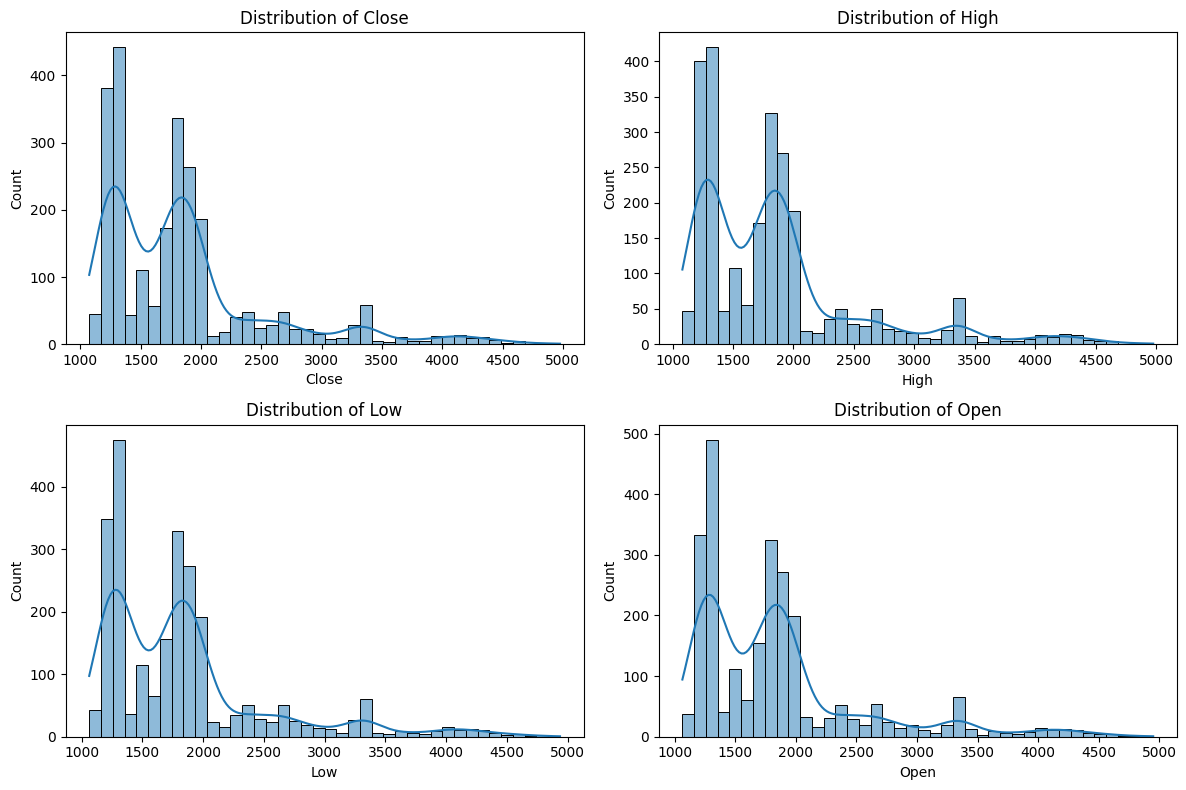

In [ ]:
#visualizacion de las distribuciones de cada columna relevante

numerical_cols = ['Close', 'High', 'Low', 'Open',]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))


for ax, col in zip(axs.ravel(), numerical_cols):
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

fig.tight_layout()

In [ ]:
#Analizar y tratar de encontrar datos de valores nulos o faltantes en cada columna relevante

print('Valores nulos por columna:')
print(data.isnull().sum())

print('\nPorcentaje de valores nulos por columna:')
print((data.isnull().sum() / len(data)) * 100)

Valores nulos por columna:
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

Porcentaje de valores nulos por columna:
Date      0.0
Close     0.0
High      0.0
Low       0.0
Open      0.0
Volume    0.0
dtype: float64


<Axes: >

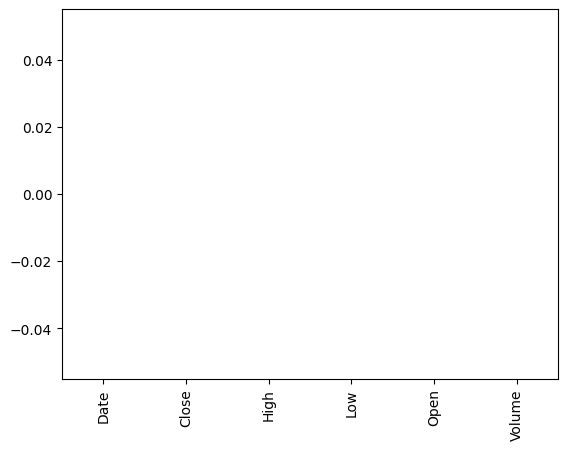

In [ ]:
#distribucion de Valores faltantes
missing_counts = data.isnull().sum()
missing_counts.plot(kind='bar')

Hallazgos principales:

Se identificó y corrigió el problema de las filas iniciales y las columnas se convirtieron a sus tipos de datos correctos (Date como datetime,las columnas de precios y volumen como numéricas).

Valores Nulos: No se encontraron valores nulos en ninguna de las columnas relevantes. Esto significa que no se requiere imputacion de datos, simplificando los siguientes pasos de preprocesamiento.


Distribución de Datos:

Las columnas de precios (Close, High, Low, Open) están concentradas hacia la izquierda del gráfico, lo cual demuestra una influencia fuerte por los valores en común, los cuales suelen demostrar un valor entre 1000 y 2000 USD para la mayor parte de los valores


### Implementación del Pipeline de Preprocesamiento

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer

In [ ]:
#Definir las columnas numéricas y categóricas
numerical_features = ['Open', 'High', 'Low', 'Volume']

data['month'] = data['Date'].dt.month
data['dayofweek'] = data['Date'].dt.dayofweek

categorical_features = ['month', 'dayofweek']

# transformaciones para cada tipo de columna
# Pipeline para características numéricas: PowerTransformer para manejar el sesgo, luego StandardScaler

numerical_transformer = Pipeline(steps=[
    ('power', PowerTransformer(method='yeo-johnson')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#Combinacion de transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

#Division de los datos en caracteristicas (X) y variable objetivo (y)
X = data.drop(['Close', 'Date'], axis=1) #se exluyen close y target
y = data['Close']

X_preprocessed = preprocessor.fit_transform(X)

print("Dimensiones de X antes del preprocesamiento:", X.shape)
print("Dimensiones de X después del preprocesamiento:", X_preprocessed.shape)


Dimensiones de X antes del preprocesamiento: (2528, 6)
Dimensiones de X después del preprocesamiento: (2528, 21)


In [ ]:
#Division de los datos en conjuntos de entrenamiento y prueba, 80% para el entrenamiento el restante para la prueba

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

Dimensiones de X_train: (2022, 6)
Dimensiones de X_test: (506, 6)
Dimensiones de y_train: (2022,)
Dimensiones de y_test: (506,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

#pipeline que combine el preprocesador y el modelo de regresionn lineal

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


model_pipeline.fit(X_train, y_train)

print("Modelo de regresion linea entrenado exitosamente ")

#realizar predicciones con el conjunto de prueba
y_pred = model_pipeline.predict(X_test)

print("Predicciones realizadas en el conjunto de prueba.")

# primeras 15 predicciones para compararlos con los valores reales correspondientes
import pandas as pd
from IPython.display import display

print("\nPrimeras 15 predicciones y valores reales:")
predictions_df = pd.DataFrame({'Real': y_test.values[:15], 'Predicción': y_pred[:15]})
display(predictions_df)


Modelo de regresion linea entrenado exitosamente 
Predicciones realizadas en el conjunto de prueba.

Primeras 15 predicciones y valores reales:


,Real,Predicción
0,1815.900024,2127.568320
1,1277.300049,1213.971455
2,1253.000000,1130.939124
3,1750.599976,1955.601823
4,1937.800049,2184.925005
5,1349.400024,1297.876680
6,2493.500000,2591.576485
7,1210.599976,929.387661
8,1771.099976,1973.412256
9,2013.900024,2366.175929


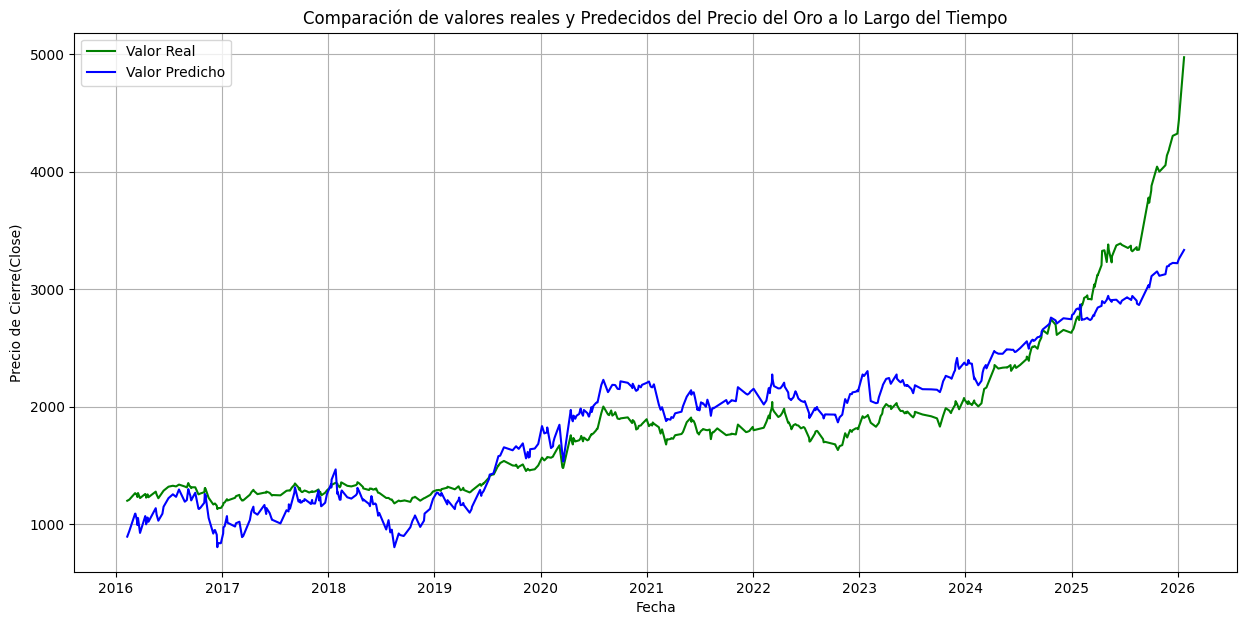

In [ ]:
#Comparacion de las predicciones con los datos reales por fecha

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

test_dates = data.loc[y_test.index, 'Date']

plot_data = pd.DataFrame({
    'Date': test_dates,
    'Real': y_test,
    'Predicción': y_pred
})

plot_data = plot_data.sort_values(by='Date').reset_index(drop=True)

plt.figure(figsize=(15, 7))
sns.lineplot(data=plot_data, x='Date', y='Real', color='green', label='Valor Real')
sns.lineplot(data=plot_data, x='Date', y='Predicción', color='blue', label='Valor Predicho')
plt.title('Comparación de valores reales y Predecidos del Precio del Oro a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre(Close)')
plt.legend()
plt.grid(True)
plt.show()